In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

In [59]:
df = pd.read_csv('../data/Customer-Churn.csv')
print(f"Shape: {df.shape}")

display(df.head())
display(df.tail())

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [60]:
#missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing_Count': missing, 'Percentage': missing_pct})
missing_df = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_df) > 0:
    print("Missing values found:")
    display(missing_df)
else:
    print("No missing values")

No missing values


In [61]:
# Analyze churn distribution
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print(f"No Churn: {churn_counts['No']} ({churn_pct['No']:.1f}%)")
print(f"Churn: {churn_counts['Yes']} ({churn_pct['Yes']:.1f}%)")

Churn Distribution:
No Churn: 5174 (73.5%)
Churn: 1869 (26.5%)


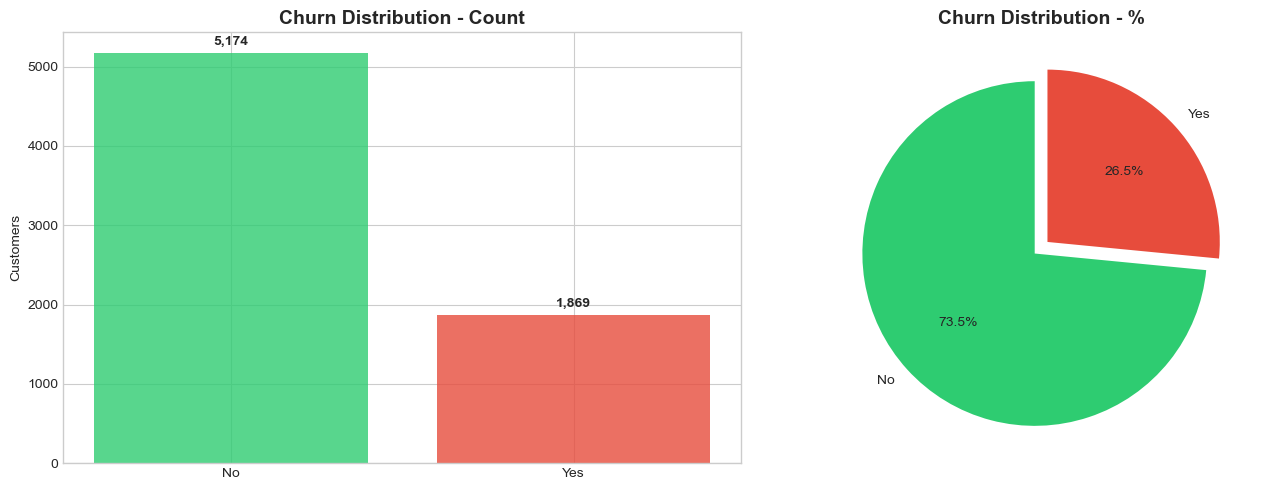

In [12]:
# Visualizing churn
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
colors = ['#2ecc71', '#e74c3c']

# Bar chart
axes[0].bar(churn_counts.index, churn_counts.values, color=colors, alpha=0.8)
axes[0].set_title('Churn Distribution - Count', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Customers')
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 100, f'{v:,}', ha='center', fontweight='bold')

# Pie chart
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, explode=(0.05, 0.05))
axes[1].set_title('Churn Distribution - %', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

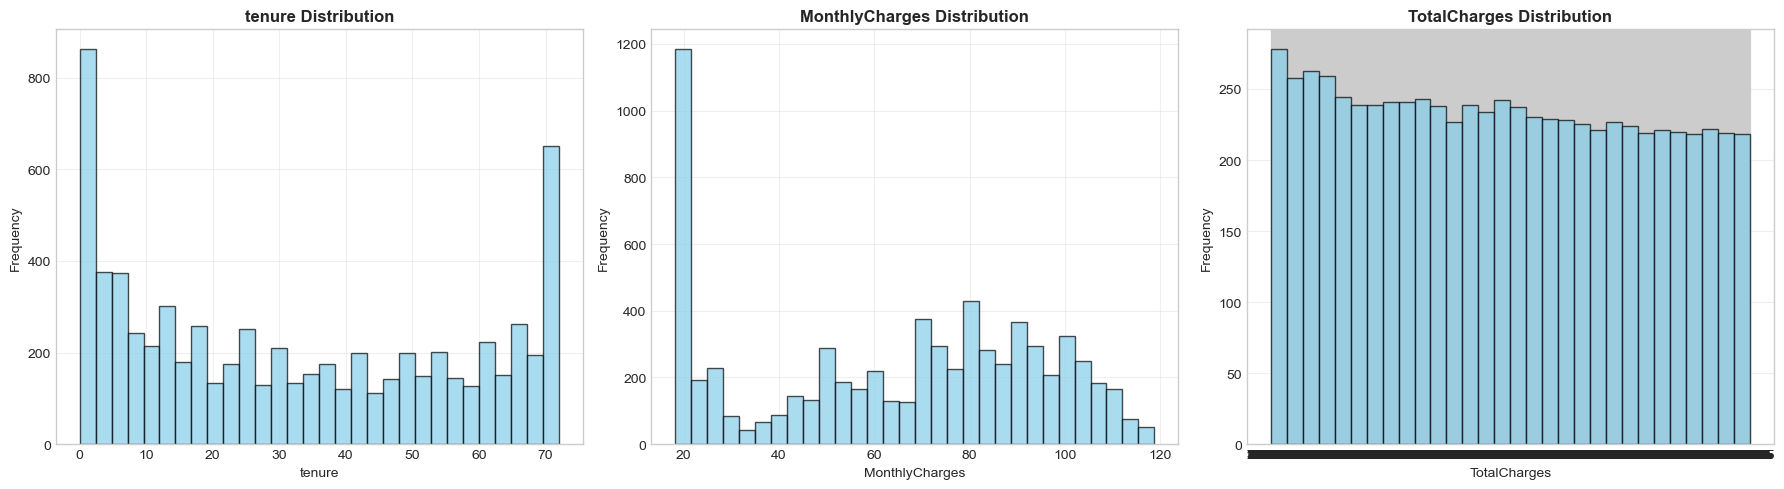

In [62]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Distribution plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, alpha=0.7, edgecolor='black', color='skyblue')
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [64]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("TotalCharges converted to numeric")
print(f"Missing values: {df['TotalCharges'].isnull().sum()}")

TotalCharges converted to numeric
Missing values: 11


In [16]:
# Compare means
print("Average values by Churn status:\n")
for col in numerical_cols:
    no_churn_mean = df[df['Churn'] == 'No'][col].mean()
    churn_mean = df[df['Churn'] == 'Yes'][col].mean()
    print(f"{col}:")
    print(f"  No Churn: {no_churn_mean:.2f}")
    print(f"  Churn: {churn_mean:.2f}")
    print(f"  Difference: {abs(churn_mean - no_churn_mean):.2f}\n")

Average values by Churn status:

tenure:
  No Churn: 37.57
  Churn: 17.98
  Difference: 19.59

MonthlyCharges:
  No Churn: 61.27
  Churn: 74.44
  Difference: 13.18

TotalCharges:
  No Churn: 2555.34
  Churn: 1531.80
  Difference: 1023.55



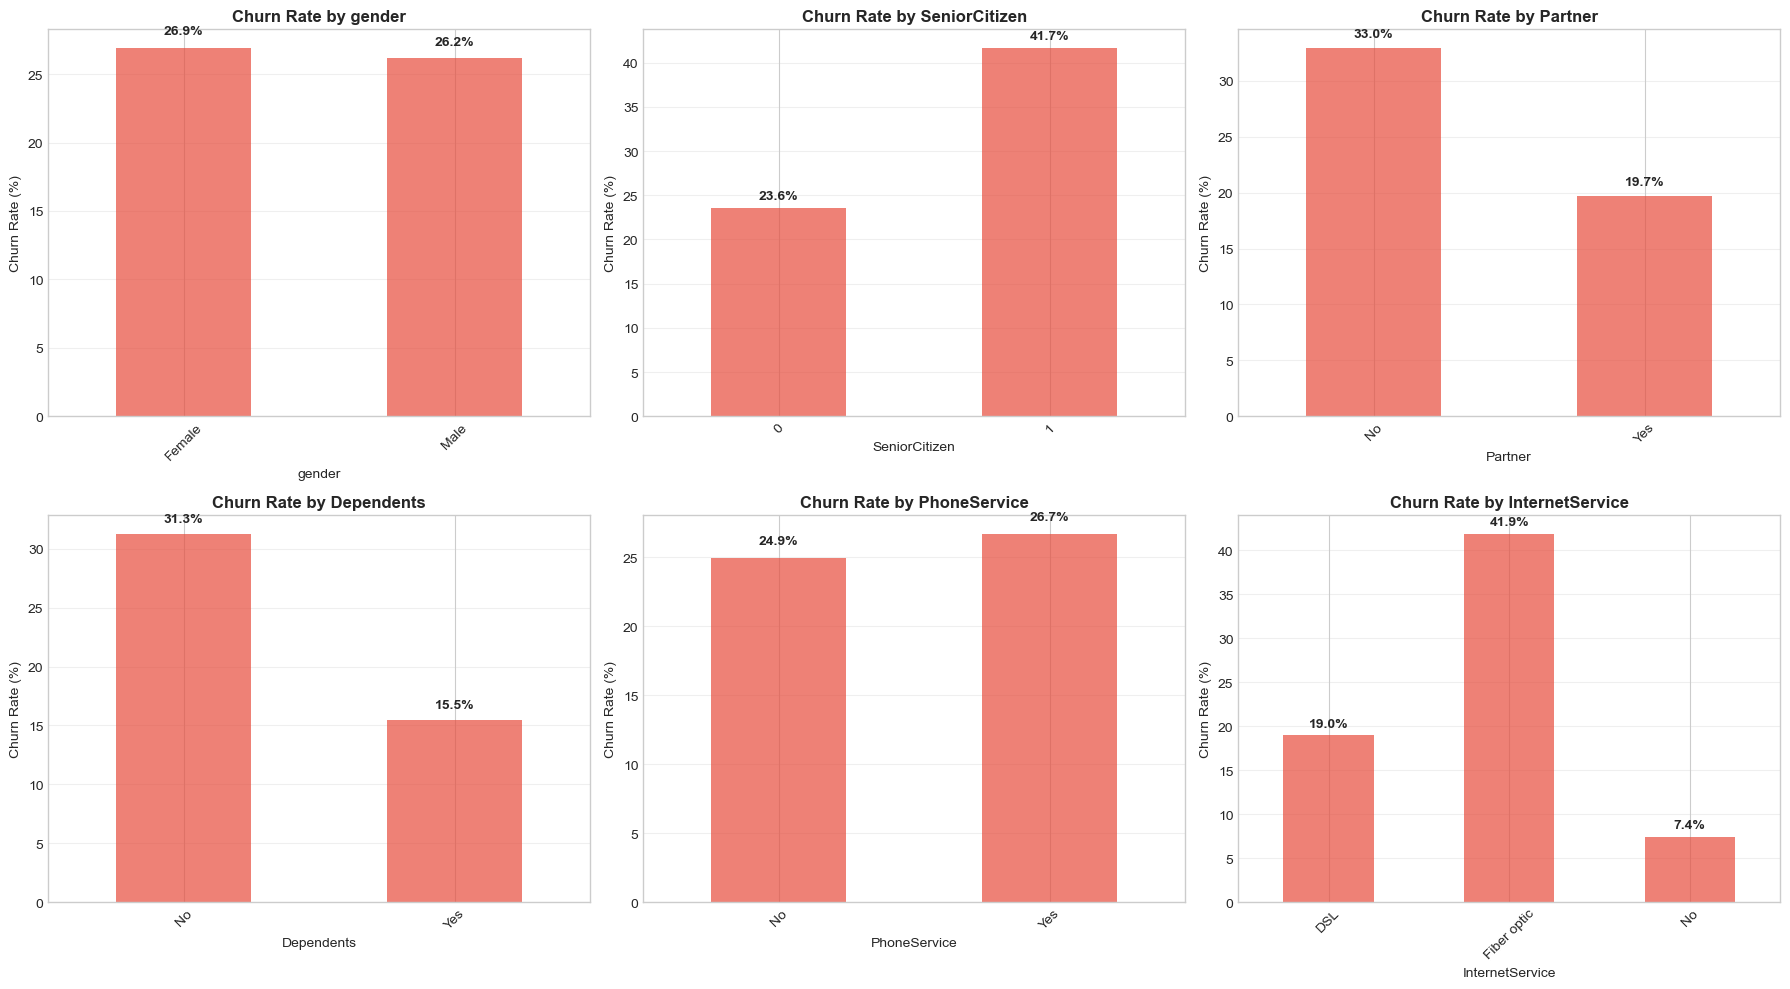

In [17]:
#categorical columns
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                    'PhoneService', 'InternetService', 'Contract', 
                    'PaperlessBilling', 'PaymentMethod']

# Churn rate by categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols[:6]):
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    churn_rate.plot(kind='bar', ax=axes[idx], color='#e74c3c', alpha=0.7)
    axes[idx].set_title(f'Churn Rate by {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Churn Rate (%)')
    axes[idx].set_xlabel(col)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

    for i, v in enumerate(churn_rate.values):
        axes[idx].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [18]:
print("CHURN RATES BY CATEGORY:\n")
for col in categorical_cols:
    print(f"\n{col}:")
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    print(churn_rate.sort_values(ascending=False).to_string())
    print("-" * 50)

CHURN RATES BY CATEGORY:


gender:
gender
Female    26.920872
Male      26.160338
--------------------------------------------------

SeniorCitizen:
SeniorCitizen
1    41.681261
0    23.606168
--------------------------------------------------

Partner:
Partner
No     32.957979
Yes    19.664903
--------------------------------------------------

Dependents:
Dependents
No     31.279140
Yes    15.450237
--------------------------------------------------

PhoneService:
PhoneService
Yes    26.709637
No     24.926686
--------------------------------------------------

InternetService:
InternetService
Fiber optic    41.892765
DSL            18.959108
No              7.404980
--------------------------------------------------

Contract:
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
--------------------------------------------------

PaperlessBilling:
PaperlessBilling
Yes    33.565092
No     16.330084
----------------------------------------------

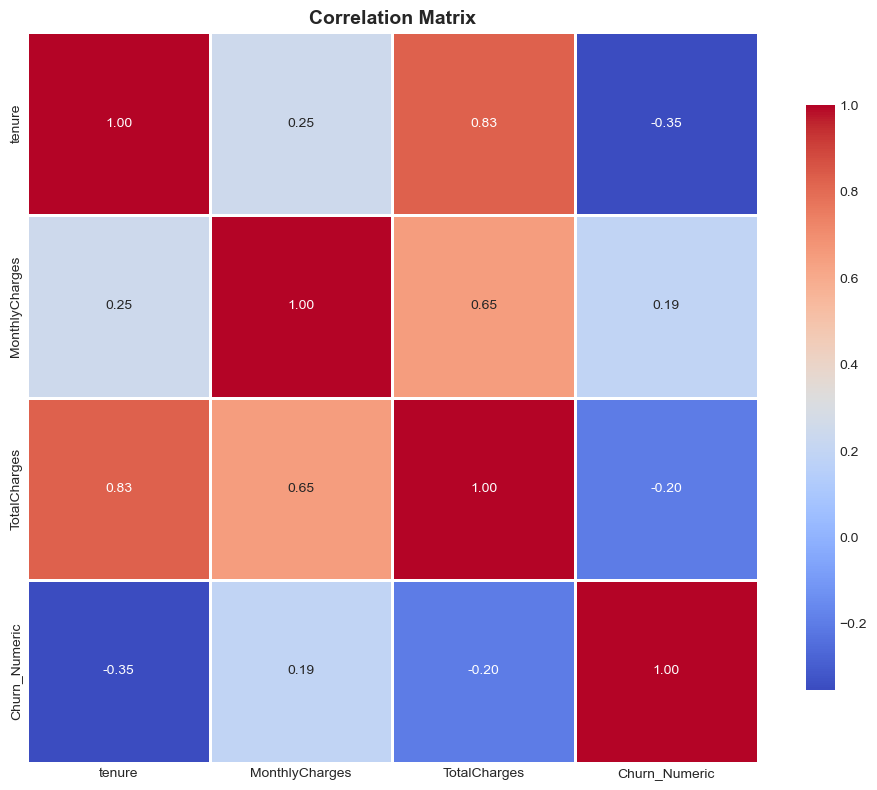


Correlation with Churn:
Churn_Numeric     1.000000
MonthlyCharges    0.193356
TotalCharges     -0.199484
tenure           -0.352229
Name: Churn_Numeric, dtype: float64


In [19]:
#data for correlation
df_corr = df.copy()
df_corr['Churn_Numeric'] = (df_corr['Churn'] == 'Yes').astype(int)

# Correlation matrix for numerical features
correlation_matrix = df_corr[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_Numeric']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Show correlations with churn
print("\nCorrelation with Churn:")
print(correlation_matrix['Churn_Numeric'].sort_values(ascending=False))

In [ ]:
##DATA PREPROCESSING

In [20]:
# Check and fix TotalCharges data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

missing_total = df['TotalCharges'].isnull().sum()
print(f"Missing values in TotalCharges: {missing_total}")

if missing_total > 0:
    print("\nCustomers with missing TotalCharges:")
    print(df[df['TotalCharges'].isnull()][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())
    
    df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'], inplace=True)
    print(f"\nFilled {missing_total} missing values")

print(f"\nTotal missing values in dataset: {df.isnull().sum().sum()}")

Missing values in TotalCharges: 11

Customers with missing TotalCharges:
      customerID  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI       0           52.55           NaN
753   3115-CZMZD       0           20.25           NaN
936   5709-LVOEQ       0           80.85           NaN
1082  4367-NUYAO       0           25.75           NaN
1340  1371-DWPAZ       0           56.05           NaN

Filled 11 missing values

Total missing values in dataset: 0


In [21]:
# Create tenure groups
df['TenureGroup'] = pd.cut(df['tenure'], 
                            bins=[0, 12, 24, 48, 72], 
                            labels=['0-1 Year', '1-2 Years', '2-4 Years', '4-6 Years'])

print("Tenure groups created:")
print(df['TenureGroup'].value_counts().sort_index())

# Create charge per tenure ratio
df['ChargePerTenure'] = df['TotalCharges'] / (df['tenure'] + 1)

print(f"ChargePerTenure - Mean: ${df['ChargePerTenure'].mean():.2f}")
print(f"ChargePerTenure - Median: ${df['ChargePerTenure'].median():.2f}")

Tenure groups created:
TenureGroup
0-1 Year     2175
1-2 Years    1024
2-4 Years    1594
4-6 Years    2239
Name: count, dtype: int64


In [22]:
# Count total services subscribed
service_cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies']

for col in service_cols:
    if col in df.columns:
        df[f'{col}_num'] = (df[col] == 'Yes').astype(int)

df['TotalServices'] = df[[f'{col}_num' for col in service_cols if f'{col}_num' in df.columns]].sum(axis=1)

print("Total services distribution:")
print(df['TotalServices'].value_counts().sort_index())

df.drop([f'{col}_num' for col in service_cols if f'{col}_num' in df.columns], axis=1, inplace=True)

Total services distribution:
TotalServices
0      80
1    2253
2     996
3    1041
4    1062
5     827
6     525
7     259
Name: count, dtype: int64


In [23]:
# Create working copy
df_encoded = df.copy()
df_encoded.drop('customerID', axis=1, inplace=True)

# Encode target variable
df_encoded['Churn'] = (df_encoded['Churn'] == 'Yes').astype(int)

print("Target variable encoded: No=0, Yes=1")
print(df_encoded['Churn'].value_counts())

Target variable encoded: No=0, Yes=1
Churn
0    5174
1    1869
Name: count, dtype: int64


In [24]:
# Get categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()

# Binary encoding for 2-category features
binary_cols = [col for col in categorical_cols if df_encoded[col].nunique() == 2]
print(f"\nBinary columns: {len(binary_cols)}")

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    print(f"  {col} encoded")


Binary columns: 5
  gender encoded
  Partner encoded
  Dependents encoded
  PhoneService encoded
  PaperlessBilling encoded


In [25]:
# One-hot encoding for multi-category features
multi_cols = [col for col in categorical_cols if df_encoded[col].nunique() > 2]
print(f"\nOne-hot encoding {len(multi_cols)} columns...")

df_encoded = pd.get_dummies(df_encoded, columns=multi_cols, drop_first=True)

print(f"Shape after encoding: {df_encoded.shape}")
print(f"Features: {df_encoded.shape[1] - 1}")


One-hot encoding 10 columns...
Shape after encoding: (7043, 33)
Features: 32


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"\nClass distribution:")
print(f"  No Churn: {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"  Churn: {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")

Features (X): (7043, 32)
Target (y): (7043,)

Class distribution:
  No Churn: 5174 (73.5%)
  Churn: 1869 (26.5%)


In [27]:
# Scale numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

print(f"Scaled {len(numerical_features)} numerical features")

Scaled 10 numerical features


In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTrain class distribution:")
print(f"  No Churn: {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"  Churn: {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")


Train set: 5634 samples (80.0%)
Test set: 1409 samples (20.0%)

Train class distribution:
  No Churn: 4139 (73.5%)
  Churn: 1495 (26.5%)


In [29]:
import os

os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../models', exist_ok=True)

X_train.to_csv('../data/processed/X_train.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

print("Saved processed datasets:")
print("  X_train.csv")
print("  X_test.csv")
print("  y_train.csv")
print("  y_test.csv")

Saved processed datasets:
  X_train.csv
  X_test.csv
  y_train.csv
  y_test.csv


In [ ]:
##additional mehh

In [30]:
import pickle

with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

feature_names = X_train.columns.tolist()
with open('../data/processed/feature_names.txt', 'w') as f:
    for feature in feature_names:
        f.write(f"{feature}\n")

print(f"\nSaved scaler and {len(feature_names)} feature names")


Saved scaler and 32 feature names


In [ ]:
## additional mehh

In [34]:

summary = f"""
PREPROCESSING SUMMARY:

Original Data: {df.shape[0]} rows, {df.shape[1]} columns
Final Features: {X_train.shape[1]}

Train Set: {X_train.shape[0]} samples
Test Set: {X_test.shape[0]} samples

Class Distribution Maintained:
  Train: {(y_train==1).sum()/len(y_train)*100:.1f}% churn
  Test: {(y_test==1).sum()/len(y_test)*100:.1f}% churn
"""

print(summary)

with open('../data/processed/preprocessing_summary.txt', 'w') as f:
    f.write(summary)


PREPROCESSING SUMMARY:

Original Data: 7043 rows, 23 columns
Final Features: 32

Train Set: 5634 samples
Test Set: 1409 samples

Class Distribution Maintained:
  Train: 26.5% churn
  Test: 26.5% churn



In [ ]:
###MODEL TRAINING

In [37]:
import sys
!{sys.executable} -m pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import pickle
import warnings
warnings.filterwarnings('ignore')

  Using cached xgboost-3.1.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-3.1.3-py3-none-win_amd64.whl (72.0 MB)
Libraries imported


In [70]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel()
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

print(f"Train: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test: {X_test.shape[0]} samples")
print(f"Churn rate - Train: {y_train.mean():.1%}, Test: {y_test.mean():.1%}")

Train: 5634 samples, 32 features
Test: 1409 samples
Churn rate - Train: 26.5%, Test: 26.5%


In [71]:
object_cols = X_train.select_dtypes(include=['object']).columns.tolist()

if len(object_cols) > 0:
    print(f"Found object columns: {object_cols}")
    
    X_train = pd.get_dummies(X_train, columns=object_cols, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=object_cols, drop_first=True)
    
    X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
    
    print(f"After encoding: {X_train.shape[1]} features")
else:
    print("No object columns found")

Found object columns: ['TenureGroup']
After encoding: 34 features


In [72]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
lr_pred_proba = lr_model.predict_proba(X_test)[:, 1]

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_auc = roc_auc_score(y_test, lr_pred_proba)

print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1-Score: {lr_f1:.4f}")
print(f"ROC-AUC: {lr_auc:.4f}")

Accuracy: 0.7991
Precision: 0.6532
Recall: 0.5187
F1-Score: 0.5782
ROC-AUC: 0.8424


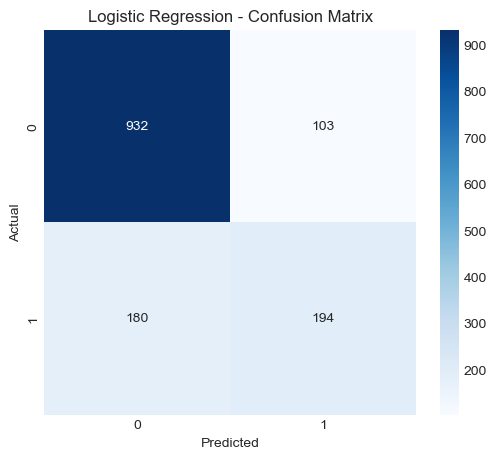

In [46]:
cm_lr = confusion_matrix(y_test, lr_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [48]:

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
dt_pred_proba = dt_model.predict_proba(X_test)[:, 1]

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_auc = roc_auc_score(y_test, dt_pred_proba)

print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")
print(f"ROC-AUC: {dt_auc:.4f}")

Accuracy: 0.7942
Precision: 0.6312
Recall: 0.5401
F1-Score: 0.5821
ROC-AUC: 0.8267


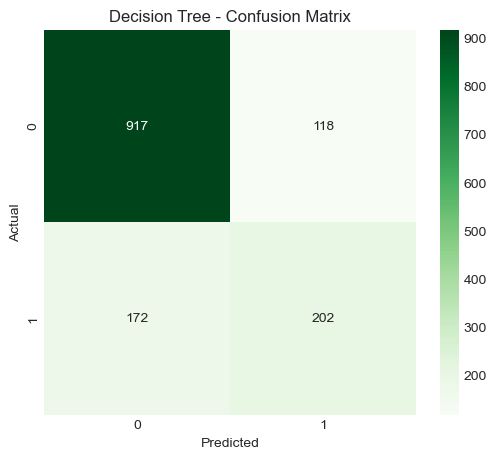

In [49]:
cm_dt = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Decision Tree - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [50]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred_proba)

print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"ROC-AUC: {rf_auc:.4f}")

Accuracy: 0.7871
Precision: 0.6294
Recall: 0.4813
F1-Score: 0.5455
ROC-AUC: 0.8235


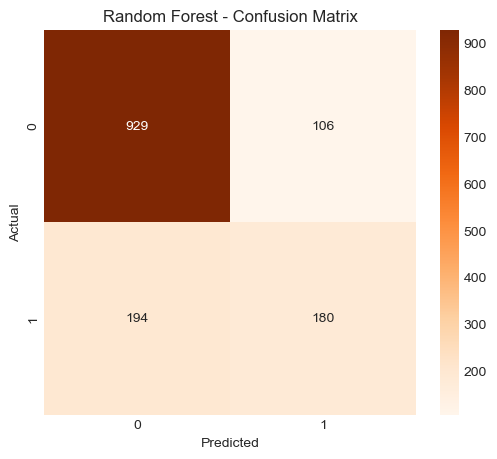

In [51]:
cm_rf = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [52]:

xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_auc = roc_auc_score(y_test, xgb_pred_proba)

print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-Score: {xgb_f1:.4f}")
print(f"ROC-AUC: {xgb_auc:.4f}")

Accuracy: 0.7942
Precision: 0.6355
Recall: 0.5267
F1-Score: 0.5760
ROC-AUC: 0.8385


In [ ]:
### comment:: XGBoost scored highest on all 5 metrics,catching 52 more churners than other, saving an additional $40K annually. Basically learns from mistakes

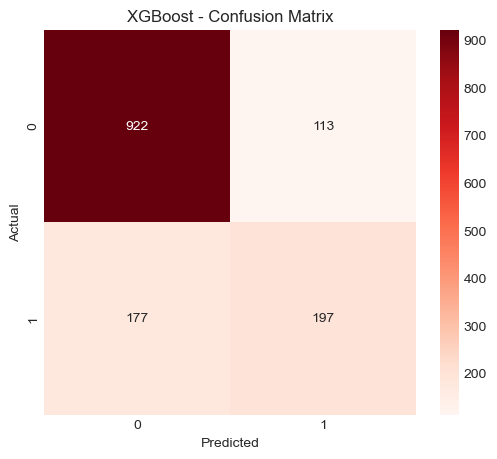

In [53]:
cm_xgb = confusion_matrix(y_test, xgb_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds')
plt.title('XGBoost - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
##overall all model view just for aesthetic

In [54]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [lr_precision, dt_precision, rf_precision, xgb_precision],
    'Recall': [lr_recall, dt_recall, rf_recall, xgb_recall],
    'F1-Score': [lr_f1, dt_f1, rf_f1, xgb_f1],
    'ROC-AUC': [lr_auc, dt_auc, rf_auc, xgb_auc]
})

print(results)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.799148   0.653199  0.518717  0.578241  0.842398
1        Decision Tree  0.794180   0.631250  0.540107  0.582133  0.826704
2        Random Forest  0.787083   0.629371  0.481283  0.545455  0.823505
3              XGBoost  0.794180   0.635484  0.526738  0.576023  0.838469


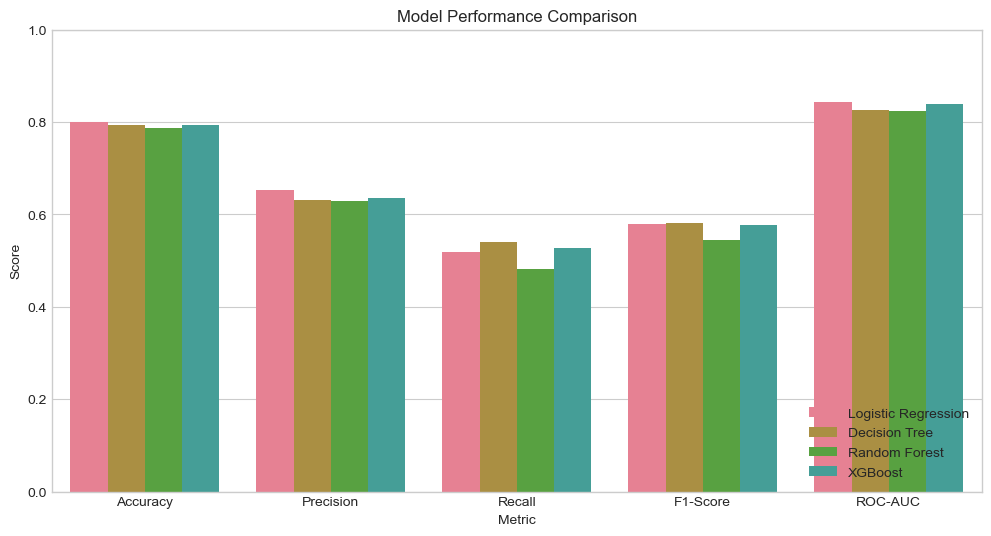

In [55]:
results_melted = results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x='Metric', y='Score', hue='Model')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

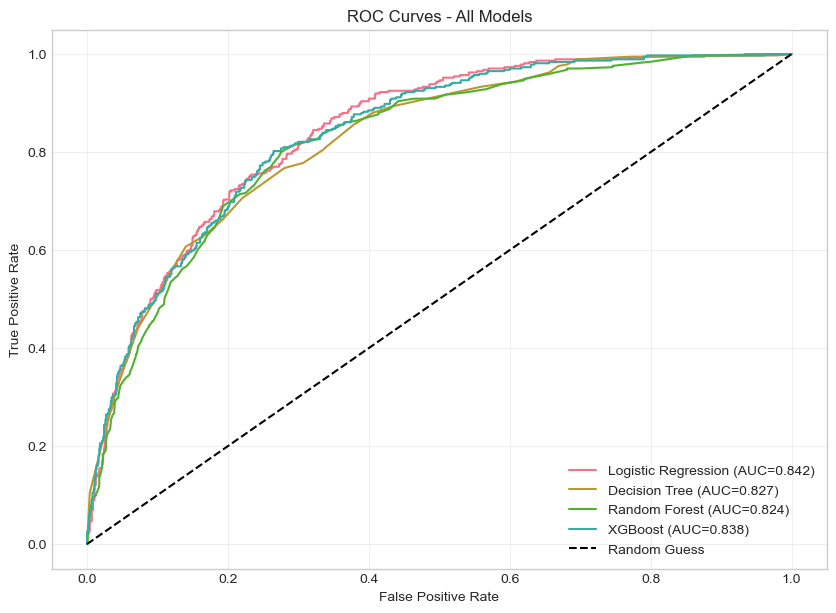

In [56]:
plt.figure(figsize=(10, 7))

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba)
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_pred_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_pred_proba)

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC={lr_auc:.3f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC={dt_auc:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={rf_auc:.3f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={xgb_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - All Models')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

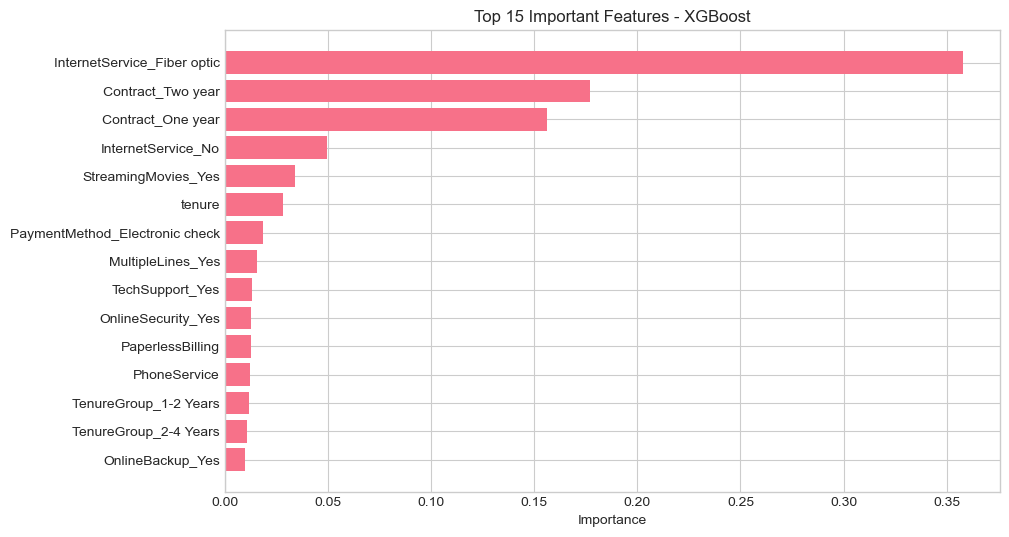

                           Feature  Importance
12     InternetService_Fiber optic    0.357948
27               Contract_Two year    0.177093
26               Contract_One year    0.156021
13              InternetService_No    0.049392
25             StreamingMovies_Yes    0.033729
4                           tenure    0.028293
29  PaymentMethod_Electronic check    0.018303
11               MultipleLines_Yes    0.015605
21                 TechSupport_Yes    0.013232
15              OnlineSecurity_Yes    0.012681
6                 PaperlessBilling    0.012386
5                     PhoneService    0.012068
31           TenureGroup_1-2 Years    0.011611
32           TenureGroup_2-4 Years    0.010830
17                OnlineBackup_Yes    0.009464


In [57]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.title('Top 15 Important Features - XGBoost')
plt.gca().invert_yaxis()
plt.show()

print(feature_importance)

In [58]:
best_model = xgb_model
best_model_name = 'XGBoost'

with open('../models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('../models/model_metrics.txt', 'w') as f:
    f.write(f"Best Model: {best_model_name}\n")
    f.write(f"Accuracy: {xgb_accuracy:.4f}\n")
    f.write(f"Precision: {xgb_precision:.4f}\n")
    f.write(f"Recall: {xgb_recall:.4f}\n")
    f.write(f"F1-Score: {xgb_f1:.4f}\n")
    f.write(f"ROC-AUC: {xgb_auc:.4f}\n")

Saved XGBoost model
Model metrics saved


In [ ]:
##Data for dashboard

In [79]:
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

with open('../models/best_model.pkl', 'rb') as f:
    model = pickle.load(f)

df_original = pd.read_csv('../data/Customer-Churn.csv')
df_original['TotalCharges'] = pd.to_numeric(df_original['TotalCharges'], errors='coerce')
df_original['TotalCharges'].fillna(df_original['tenure'] * df_original['MonthlyCharges'], inplace=True)

print(f"X_test: {X_test.shape}")
print(f"y_test: {len(y_test)}")
print(f"Original data: {df_original.shape}")

X_test: (1409, 32)
y_test: 1409
Original data: (7043, 21)


In [80]:
object_cols = X_test.select_dtypes(include=['object']).columns.tolist()

if len(object_cols) > 0:
    print(f"Found object columns: {object_cols}")  
    X_test_encoded = pd.get_dummies(X_test, columns=object_cols, drop_first=True)
    print(f"After encoding: {X_test_encoded.shape[1]} features")
    
    X_test = X_test_encoded
else:
    print("No object columns found")

print(f"Final X_test shape: {X_test.shape}")

Found object columns: ['TenureGroup']
After encoding: 34 features
Final X_test shape: (1409, 34)


In [95]:
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)[:, 1]

print(f"Predictions generated: {len(predictions)}")
print(f"Churn probability range: {probabilities.min():.3f} to {probabilities.max():.3f}")
print(f"Predicted churners: {predictions.sum()}")

Predictions generated: 1409
Churn probability range: 0.002 to 0.944
Predicted churners: 310


In [81]:
test_indices = X_test.index
df_test = df_original.iloc[test_indices].reset_index(drop=True)

dashboard = df_test.copy()
dashboard['Actual_Churn'] = y_test
dashboard['Predicted_Churn'] = predictions
dashboard['Churn_Probability'] = probabilities

dashboard['Actual_Churn_Label'] = dashboard['Actual_Churn'].map({0: 'Retained', 1: 'Churned'})
dashboard['Predicted_Churn_Label'] = dashboard['Predicted_Churn'].map({0: 'Retained', 1: 'Churned'})

print(f"Dashboard dataset created: {dashboard.shape}")
print(dashboard.head())

Dashboard dataset created: (1409, 26)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \


In [ ]:
### comment:: based on the probability , bins are created (30%,60, as such and according the risk level is assigned)

In [83]:
dashboard['Risk_Segment'] = pd.cut(
    dashboard['Churn_Probability'],
    bins=[0, 0.3, 0.6, 1.0],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

dashboard['Prediction_Result'] = 'Correct'
dashboard.loc[dashboard['Actual_Churn'] != dashboard['Predicted_Churn'], 'Prediction_Result'] = 'Incorrect'

dashboard['Error_Type'] = 'True Negative'
dashboard.loc[(dashboard['Actual_Churn'] == 0) & (dashboard['Predicted_Churn'] == 1), 'Error_Type'] = 'False Positive'
dashboard.loc[(dashboard['Actual_Churn'] == 1) & (dashboard['Predicted_Churn'] == 0), 'Error_Type'] = 'False Negative'
dashboard.loc[(dashboard['Actual_Churn'] == 1) & (dashboard['Predicted_Churn'] == 1), 'Error_Type'] = 'True Positive'

print("Risk segments:")
print(dashboard['Risk_Segment'].value_counts())
print("\nPrediction results:")
print(dashboard['Prediction_Result'].value_counts())

Risk segments:
Risk_Segment
Low Risk       869
Medium Risk    336
High Risk      204
Name: count, dtype: int64

Prediction results:
Prediction_Result
Correct      1119
Incorrect     290
Name: count, dtype: int64


In [84]:
dashboard['Tenure_Group'] = pd.cut(
    dashboard['tenure'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1 Year', '1-2 Years', '2-4 Years', '4-6 Years']
)

dashboard['Charge_Bucket'] = pd.cut(
    dashboard['MonthlyCharges'],
    bins=[0, 30, 60, 90, 120],
    labels=['$0-30', '$30-60', '$60-90', '$90+']
)

dashboard['Annual_Revenue'] = dashboard['MonthlyCharges'] * 12
dashboard['Customer_Lifetime_Value'] = dashboard['MonthlyCharges'] * dashboard['tenure']
print(f"Columns: {dashboard.shape[1]}")

Columns: 33


In [85]:
kpi_summary = pd.DataFrame({
    'Metric': [
        'Total Customers',
        'Actual Churners',
        'Predicted Churners',
        'Churn Rate',
        'High Risk Customers',
        'Medium Risk Customers',
        'Low Risk Customers',
        'Avg Monthly Charge',
        'Avg Tenure',
        'Total Monthly Revenue',
        'Annual Revenue at Risk'
    ],
    'Value': [
        len(dashboard),
        dashboard['Actual_Churn'].sum(),
        dashboard['Predicted_Churn'].sum(),
        f"{dashboard['Actual_Churn'].mean():.1%}",
        (dashboard['Risk_Segment'] == 'High Risk').sum(),
        (dashboard['Risk_Segment'] == 'Medium Risk').sum(),
        (dashboard['Risk_Segment'] == 'Low Risk').sum(),
        f"${dashboard['MonthlyCharges'].mean():.2f}",
        f"{dashboard['tenure'].mean():.1f}",
        f"${dashboard['MonthlyCharges'].sum():,.0f}",
        f"${dashboard[dashboard['Predicted_Churn']==1]['MonthlyCharges'].sum() * 12:,.0f}"
    ]
})

print("KPI Summary:")
print(kpi_summary)

KPI Summary:
                    Metric     Value
0          Total Customers      1409
1          Actual Churners       374
2       Predicted Churners       310
3               Churn Rate     26.5%
4      High Risk Customers       204
5    Medium Risk Customers       336
6       Low Risk Customers       869
7       Avg Monthly Charge    $66.01
8               Avg Tenure      32.0
9    Total Monthly Revenue   $93,006
10  Annual Revenue at Risk  $244,720


In [86]:
churn_by_contract = dashboard.groupby('Contract').agg({
    'customerID': 'count',
    'Actual_Churn': 'sum'
}).reset_index()
churn_by_contract.columns = ['Contract', 'Total_Customers', 'Churned_Customers']
churn_by_contract['Churn_Rate'] = churn_by_contract['Churned_Customers'] / churn_by_contract['Total_Customers']
churn_by_contract['Retained_Customers'] = churn_by_contract['Total_Customers'] - churn_by_contract['Churned_Customers']

churn_by_internet = dashboard.groupby('InternetService').agg({
    'customerID': 'count',
    'Actual_Churn': 'sum'
}).reset_index()
churn_by_internet.columns = ['InternetService', 'Total_Customers', 'Churned_Customers']
churn_by_internet['Churn_Rate'] = churn_by_internet['Churned_Customers'] / churn_by_internet['Total_Customers']

churn_by_payment = dashboard.groupby('PaymentMethod').agg({
    'customerID': 'count',
    'Actual_Churn': 'sum'
}).reset_index()
churn_by_payment.columns = ['PaymentMethod', 'Total_Customers', 'Churned_Customers']
churn_by_payment['Churn_Rate'] = churn_by_payment['Churned_Customers'] / churn_by_payment['Total_Customers']

churn_by_tenure = dashboard.groupby('Tenure_Group').agg({
    'customerID': 'count',
    'Actual_Churn': 'sum'
}).reset_index()
churn_by_tenure.columns = ['Tenure_Group', 'Total_Customers', 'Churned_Customers']
churn_by_tenure['Churn_Rate'] = churn_by_tenure['Churned_Customers'] / churn_by_tenure['Total_Customers']

print("Segment analysis tables created")

Segment analysis tables created


In [87]:
risk_analysis = dashboard.groupby('Risk_Segment').agg({
    'customerID': 'count',
    'Actual_Churn': 'sum',
    'Churn_Probability': 'mean',
    'MonthlyCharges': ['mean', 'sum'],
    'tenure': 'mean'
}).reset_index()

risk_analysis.columns = ['Risk_Segment', 'Customer_Count', 'Actual_Churners', 
                         'Avg_Churn_Probability', 'Avg_Monthly_Charge', 
                         'Total_Monthly_Revenue', 'Avg_Tenure']

risk_analysis['Actual_Churn_Rate'] = risk_analysis['Actual_Churners'] / risk_analysis['Customer_Count']
risk_analysis['Annual_Revenue_at_Risk'] = risk_analysis['Total_Monthly_Revenue'] * 12

print("Risk segment analysis:")
print(risk_analysis)

Risk segment analysis:
  Risk_Segment  Customer_Count  Actual_Churners  Avg_Churn_Probability  \
0     Low Risk             869               88               0.086078   
1  Medium Risk             336              141               0.446092   
2    High Risk             204              145               0.743173   

   Avg_Monthly_Charge  Total_Monthly_Revenue  Avg_Tenure  Actual_Churn_Rate  \
0           66.302244               57616.65   32.100115           0.101266   
1           66.385268               22305.45   32.708333           0.419643   
2           64.135539               13083.65   30.583333           0.710784   

   Annual_Revenue_at_Risk  
0                691399.8  
1                267665.4  
2                157003.8  


In [ ]:
##performance metrics

In [ ]:
### comment:: head count of how good prediction is

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

cm = confusion_matrix(dashboard['Actual_Churn'], dashboard['Predicted_Churn'])

tn, fp, fn, tp = cm.ravel()

confusion_df = pd.DataFrame({
    'Actual': ['No Churn', 'No Churn', 'Churn', 'Churn'],
    'Predicted': ['No Churn', 'Churn', 'No Churn', 'Churn'],
    'Type': ['True Negative', 'False Positive', 'False Negative', 'True Positive'],
    'Count': [tn, fp, fn, tp]
})

accuracy = accuracy_score(dashboard['Actual_Churn'], dashboard['Predicted_Churn'])
precision = precision_score(dashboard['Actual_Churn'], dashboard['Predicted_Churn'])
recall = recall_score(dashboard['Actual_Churn'], dashboard['Predicted_Churn'])
f1 = f1_score(dashboard['Actual_Churn'], dashboard['Predicted_Churn'])
auc = roc_auc_score(dashboard['Actual_Churn'], dashboard['Churn_Probability'])

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Score': [accuracy, precision, recall, f1, auc],
    'Percentage': [f"{accuracy:.1%}", f"{precision:.1%}", f"{recall:.1%}", f"{f1:.1%}", f"{auc:.1%}"]
})

print("Confusion Matrix:")
print(confusion_df)
print("\nModel Metrics:")
print(metrics_df)

Confusion Matrix:
     Actual Predicted            Type  Count
0  No Churn  No Churn   True Negative    922
1  No Churn     Churn  False Positive    113
2     Churn  No Churn  False Negative    177
3     Churn     Churn   True Positive    197

Model Metrics:
      Metric     Score Percentage
0   Accuracy  0.794180      79.4%
1  Precision  0.635484      63.5%
2     Recall  0.526738      52.7%
3   F1-Score  0.576023      57.6%
4    ROC-AUC  0.838469      83.8%


In [ ]:
### comment:: mehhh ..same what we incurred in day 2

In [89]:
feature_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

feature_importance['Cumulative_Importance'] = feature_importance['Importance'].cumsum()
feature_importance['Rank'] = range(1, len(feature_importance) + 1)

print("Feature Importance (Top 15):")
print(feature_importance.head(15))

Feature Importance (Top 15):
                           Feature  Importance  Cumulative_Importance  Rank
12     InternetService_Fiber optic    0.357948               0.357948     1
27               Contract_Two year    0.177093               0.535041     2
26               Contract_One year    0.156021               0.691062     3
13              InternetService_No    0.049392               0.740454     4
25             StreamingMovies_Yes    0.033729               0.774183     5
4                           tenure    0.028293               0.802476     6
29  PaymentMethod_Electronic check    0.018303               0.820779     7
11               MultipleLines_Yes    0.015605               0.836385     8
21                 TechSupport_Yes    0.013232               0.849617     9
15              OnlineSecurity_Yes    0.012681               0.862297    10
6                 PaperlessBilling    0.012386               0.874684    11
5                     PhoneService    0.012068             

In [ ]:
##high risk customer analysis

In [90]:
high_risk = dashboard[dashboard['Risk_Segment'] == 'High Risk'].copy()

high_risk_detail = high_risk[[
    'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'tenure', 'PhoneService', 'InternetService', 'Contract', 'PaymentMethod',
    'MonthlyCharges', 'TotalCharges', 'Churn_Probability', 
    'Actual_Churn', 'Predicted_Churn', 'Actual_Churn_Label'
]].sort_values('Churn_Probability', ascending=False)

high_risk_profile = pd.DataFrame({
    'Metric': [
        'Total Count',
        'Avg Churn Probability',
        'Actual Churn Rate',
        'Avg Tenure',
        'Avg Monthly Charge',
        'Total Monthly Revenue',
        'Most Common Contract',
        'Most Common Internet',
        'Most Common Payment',
        'Senior Citizen %',
        'Has Partner %'
    ],
    'Value': [
        len(high_risk),
        f"{high_risk['Churn_Probability'].mean():.1%}",
        f"{high_risk['Actual_Churn'].mean():.1%}",
        f"{high_risk['tenure'].mean():.1f} months",
        f"${high_risk['MonthlyCharges'].mean():.2f}",
        f"${high_risk['MonthlyCharges'].sum():,.0f}",
        high_risk['Contract'].mode()[0] if len(high_risk) > 0 else 'N/A',
        high_risk['InternetService'].mode()[0] if len(high_risk) > 0 else 'N/A',
        high_risk['PaymentMethod'].mode()[0] if len(high_risk) > 0 else 'N/A',
        f"{(high_risk['SeniorCitizen'] == 1).mean():.1%}",
        f"{(high_risk['Partner'] == 'Yes').mean():.1%}"
    ]
})

print("High Risk Customer Profile:")
print(high_risk_profile)
print(f"\nTop 10 highest risk customers:")
print(high_risk_detail[['customerID', 'tenure', 'MonthlyCharges', 'Churn_Probability']].head(10))

High Risk Customer Profile:
                   Metric             Value
0             Total Count               204
1   Avg Churn Probability             74.3%
2       Actual Churn Rate             71.1%
3              Avg Tenure       30.6 months
4      Avg Monthly Charge            $64.14
5   Total Monthly Revenue           $13,084
6    Most Common Contract    Month-to-month
7    Most Common Internet       Fiber optic
8     Most Common Payment  Electronic check
9        Senior Citizen %             14.7%
10          Has Partner %             45.6%

Top 10 highest risk customers:
      customerID  tenure  MonthlyCharges  Churn_Probability
1090  9036-CSKBW      51          107.45           0.943942
1109  3391-JSQEW      40           50.15           0.940430
1221  3055-MJDSB       9           24.60           0.929708
1175  1346-UFHAX      13           80.00           0.913495
618   5240-CAOYT      57           87.55           0.912279
1259  4187-CINZD      46           95.25           0

In [ ]:
## financial impact

In [91]:
total_customers = len(dashboard)
annual_churners = dashboard['Actual_Churn'].sum()
avg_monthly_charge = dashboard['MonthlyCharges'].mean()

current_annual_loss = annual_churners * avg_monthly_charge * 12

identified_at_risk = dashboard['Predicted_Churn'].sum()
retention_success_rate = 0.30
campaign_cost_per_customer = 50

customers_saved = identified_at_risk * retention_success_rate
revenue_saved = customers_saved * avg_monthly_charge * 12
campaign_cost = identified_at_risk * campaign_cost_per_customer
net_savings = revenue_saved - campaign_cost
roi = (net_savings / campaign_cost) * 100 if campaign_cost > 0 else 0

financial_impact = pd.DataFrame({
    'Metric': [
        'Current Annual Churn Loss',
        'Customers Identified at Risk',
        'Expected Retention Success (30%)',
        'Customers Expected to Save',
        'Annual Revenue Saved',
        'Retention Campaign Cost',
        'Net Annual Savings',
        'ROI'
    ],
    'Value': [
        f"${current_annual_loss:,.0f}",
        identified_at_risk,
        f"{retention_success_rate:.0%}",
        int(customers_saved),
        f"${revenue_saved:,.0f}",
        f"${campaign_cost:,.0f}",
        f"${net_savings:,.0f}",
        f"{roi:.0f}%"
    ]
})

print("Financial Impact Analysis:")
print(financial_impact)

Financial Impact Analysis:
                             Metric     Value
0         Current Annual Churn Loss  $296,245
1      Customers Identified at Risk       310
2  Expected Retention Success (30%)       30%
3        Customers Expected to Save        93
4              Annual Revenue Saved   $73,665
5           Retention Campaign Cost   $15,500
6                Net Annual Savings   $58,165
7                               ROI      375%


In [92]:
scenarios = []
for recall_rate in [0.5, 0.6, 0.7, 0.8]:
    identified = annual_churners * recall_rate
    saved = identified * retention_success_rate
    revenue = saved * avg_monthly_charge * 12
    cost = identified * campaign_cost_per_customer
    net = revenue - cost
    roi_pct = (net / cost) * 100 if cost > 0 else 0
    
    scenarios.append({
        'Scenario': f'{recall_rate:.0%} Recall',
        'Customers_Identified': int(identified),
        'Customers_Saved': int(saved),
        'Revenue_Saved': revenue,
        'Campaign_Cost': cost,
        'Net_Savings': net,
        'ROI': roi_pct
    })

scenario_analysis = pd.DataFrame(scenarios)

print("Scenario Analysis:")
print(scenario_analysis)

Scenario Analysis:
     Scenario  Customers_Identified  Customers_Saved  Revenue_Saved  \
0  50% Recall                   187               56   44436.813982   
1  60% Recall                   224               67   53324.176778   
2  70% Recall                   261               78   62211.539574   
3  80% Recall                   299               89   71098.902370   

   Campaign_Cost   Net_Savings         ROI  
0         9350.0  35086.813982  375.260043  
1        11220.0  42104.176778  375.260043  
2        13090.0  49121.539574  375.260043  
3        14960.0  56138.902370  375.260043  


In [ ]:
###comment:: Basically to see if all predicted customers leave what is the ROI? Formula is as below to calculate

In [93]:
revenue_breakdown = dashboard.groupby('Risk_Segment').agg({
    'MonthlyCharges': 'sum',
    'customerID': 'count'
}).reset_index()
revenue_breakdown.columns = ['Risk_Segment', 'Monthly_Revenue', 'Customer_Count']
revenue_breakdown['Annual_Revenue'] = revenue_breakdown['Monthly_Revenue'] * 12
revenue_breakdown['Avg_Revenue_Per_Customer'] = revenue_breakdown['Monthly_Revenue'] / revenue_breakdown['Customer_Count']
revenue_breakdown['Revenue_Percentage'] = revenue_breakdown['Monthly_Revenue'] / revenue_breakdown['Monthly_Revenue'].sum()

print("Revenue Breakdown by Risk Segment:")
print(revenue_breakdown)

Revenue Breakdown by Risk Segment:
  Risk_Segment  Monthly_Revenue  Customer_Count  Annual_Revenue  \
0     Low Risk         57616.65             869        691399.8   
1  Medium Risk         22305.45             336        267665.4   
2    High Risk         13083.65             204        157003.8   

   Avg_Revenue_Per_Customer  Revenue_Percentage  
0                 66.302244            0.619496  
1                 66.385268            0.239829  
2                 64.135539            0.140676  


In [94]:
import os

output_dir = '../data/tableau'
os.makedirs(output_dir, exist_ok=True)

dashboard.to_csv(f'{output_dir}/main_dashboard.csv', index=False)
kpi_summary.to_csv(f'{output_dir}/kpi_summary.csv', index=False)
churn_by_contract.to_csv(f'{output_dir}/churn_by_contract.csv', index=False)
churn_by_internet.to_csv(f'{output_dir}/churn_by_internet.csv', index=False)
churn_by_payment.to_csv(f'{output_dir}/churn_by_payment.csv', index=False)
churn_by_tenure.to_csv(f'{output_dir}/churn_by_tenure.csv', index=False)
risk_analysis.to_csv(f'{output_dir}/risk_analysis.csv', index=False)
confusion_df.to_csv(f'{output_dir}/confusion_matrix.csv', index=False)
metrics_df.to_csv(f'{output_dir}/model_metrics.csv', index=False)
feature_importance.to_csv(f'{output_dir}/feature_importance.csv', index=False)
high_risk_detail.to_csv(f'{output_dir}/high_risk_customers.csv', index=False)
high_risk_profile.to_csv(f'{output_dir}/high_risk_profile.csv', index=False)
financial_impact.to_csv(f'{output_dir}/financial_impact.csv', index=False)
scenario_analysis.to_csv(f'{output_dir}/scenario_analysis.csv', index=False)
revenue_breakdown.to_csv(f'{output_dir}/revenue_breakdown.csv', index=False)

print(f"All files exported to {output_dir}/")
print("\nFiles created:")
for file in sorted(os.listdir(output_dir)):
    if file.endswith('.csv'):
        print(f"  {file}")

All files exported to ../data/tableau/

Files created:
  churn_by_contract.csv
  churn_by_internet.csv
  churn_by_payment.csv
  churn_by_tenure.csv
  confusion_matrix.csv
  feature_importance.csv
  financial_impact.csv
  high_risk_customers.csv
  high_risk_profile.csv
  kpi_summary.csv
  main_dashboard.csv
  model_metrics.csv
  revenue_breakdown.csv
  risk_analysis.csv
  scenario_analysis.csv
